S&P Stock Analysis for AAN and Persistent Model:
The simplest model that we could use to make predictions would be to persist the last observation. We can call this a persistence model and it provides a baseline of performance for the problem that we can use for comparison with an autoregression model.
he predictions are made using a walk-forward validation model so that we can persist the most recent observations for the next day. This means that we are not making a 30-day forecast, but 30 1-day forecasts.

In [5]:
import pandas as pd
import quandl

df = pd.read_csv('/Users/XXX/Downloads/ticker_500.csv')
tickers = df['sp_500_ticker'].values.tolist()

In [33]:
quandl.ApiConfig.api_key = "Your Key"
start = pd.datetime(2013,1,1)
end = pd.datetime(2019,1,1)

All the files have the following columns: Date - in format: yyyy-mm-dd

Open - price of the stock at market open (this is NYSE data so all in USD)

High - Highest price reached in the day

Low Close - Lowest price reached in the day

Volume - Number of shares traded

Name - the stock's ticker name

In [45]:
# with out start and end date
# data = quandl.get(["WIKI/AAPL.1","WIKI/AAPL.2","WIKI/AAPL.3","WIKI/AAPL.4", "WIKI/AAPL.5"] ) 
# with start and end date
data = quandl.get(["WIKI/AAN.1","WIKI/AAN.2","WIKI/AAN.3","WIKI/AAN.4", "WIKI/AAN.5"], start_date=start, end_date=end )

In [55]:
# Add the ticker name to data frame
data['Name'] = "AAN"
# data

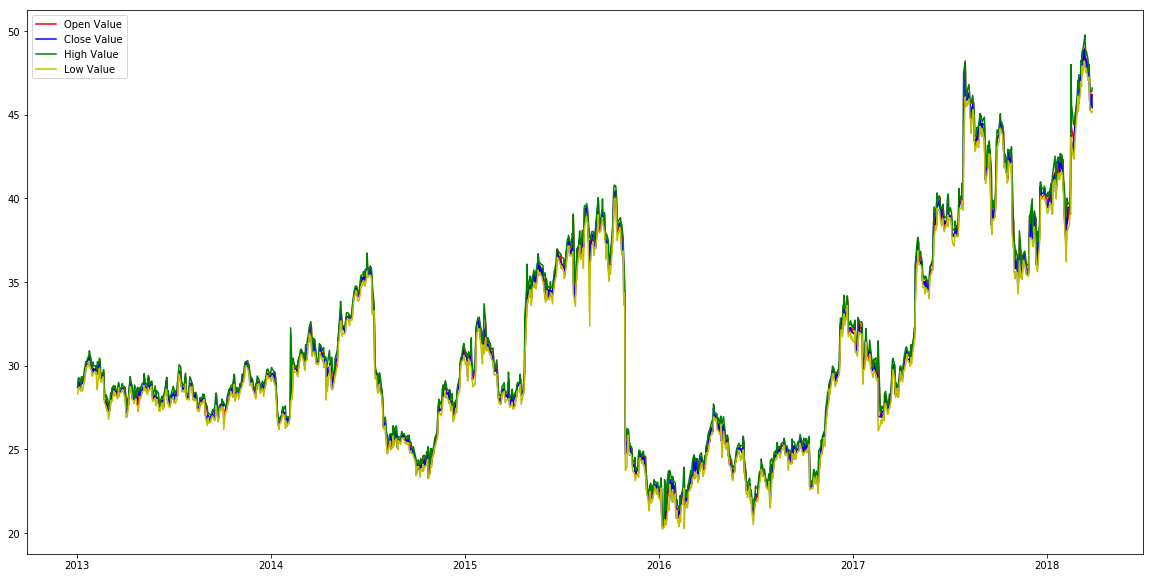

In [57]:
import matplotlib.pyplot as plt
fig,ax1 = plt.subplots(figsize=(20, 10))
# plt.plot(data[['WIKI/AAN - Open','WIKI/AAN - Close','WIKI/AAN - Open','WIKI/AAN - Close']])
open_val, = plt.plot(data[['WIKI/AAN - Open']],color='r',label=u'Open Value')
close_val, = plt.plot(data[['WIKI/AAN - Close']],color='b',label=u'Close Value')
high_val, = plt.plot(data[['WIKI/AAN - High']],color='g',label=u'High Value')
low_val, = plt.plot(data[['WIKI/AAN - Low']],color='y',label=u'Low Value')
plt.legend(handles=[open_val,close_val,high_val,low_val])
plt.show()

In [58]:
from pandas import concat
from sklearn.metrics import mean_squared_error 

In [59]:
highValue = data['WIKI/AAN - High']

In [62]:
values = pd.DataFrame(highValue.values)
values.head(10)

,0
0,28.7800
1,29.2500
2,29.2900
3,29.1300
4,28.8600
5,29.3450
6,29.3400
7,29.1099
8,29.4900
9,29.8500


In [65]:
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
dataframe.head(10)

,t-1,t+1
0,NaN,28.7800
1,28.7800,29.2500
2,29.2500,29.2900
3,29.2900,29.1300
4,29.1300,28.8600
5,28.8600,29.3450
6,29.3450,29.3400
7,29.3400,29.1099
8,29.1099,29.4900
9,29.4900,29.8500


In [69]:
X = dataframe.values
type(X)
len(X)

1317

In [72]:
print(len(X)-30)

1287


In [73]:
train, test = X[1:len(X)-30], X[len(X)-30:]

In [74]:
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

Test MSE: 2.282


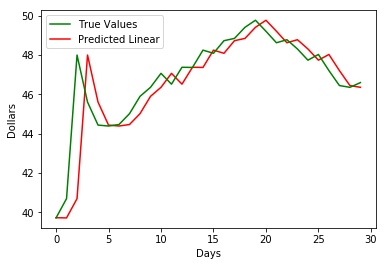

In [75]:
# persistence model
def model_persistence(x):
    return x
 
# walking-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
reg_val, = plt.plot(predictions,color='r',label=u'Predicted Linear')
true_val, = plt.plot(test_y,color='g', label='True Values')
plt.legend(handles=[true_val,reg_val])
plt.ylabel('Dollars')
plt.xlabel('Days')
plt.show()